# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

In [59]:
import osmnx as ox
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pprint

# Outline of Lexington (Fayette)

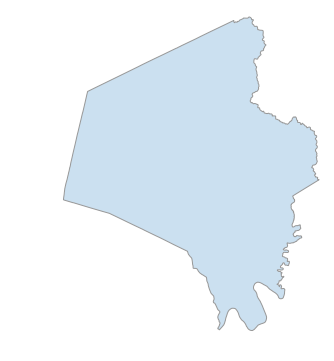

(<matplotlib.figure.Figure at 0x3a364048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2fd5f978>)

In [60]:

city = ox.gdf_from_place('Fayette, Kentucky')
ox.plot_shape(ox.project_gdf(city))

# Full Map

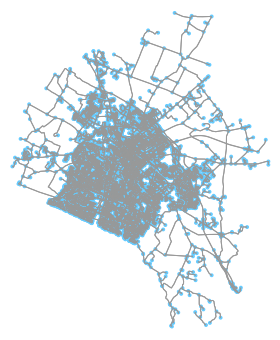

(<matplotlib.figure.Figure at 0x128c4f98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128c4320>)

In [2]:
G = ox.graph_from_place('Fayette, Kentucky', network_type = 'drive')
ox.plot_graph(ox.project_graph(G))

# Basic Stats for Map

In [61]:
basic_stats = ox.basic_stats(G)
pprint.pprint(basic_stats)

{'circuity_avg': 1.08157851557899,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 178.11497001818265,
 'edge_length_total': 4604093.860000003,
 'intersection_count': 7918,
 'intersection_density_km': None,
 'k_avg': 4.887775361633733,
 'm': 25849,
 'n': 10577,
 'node_density_km': None,
 'self_loop_proportion': 0.01094819915664049,
 'street_density_km': None,
 'street_length_avg': 181.9878771806917,
 'street_length_total': 2597512.9710000125,
 'street_segments_count': 14273,
 'streets_per_node_avg': 2.6791150609813745,
 'streets_per_node_counts': {0: 0,
                             1: 2659,
                             2: 36,
                             3: 5967,
                             4: 1871,
                             5: 43,
                             6: 1},
 'streets_per_node_proportion': {0: 0.0,
                                 1: 0.25139453531247047,
                                 2: 0.003403611

# Origin and Destination Variables
Create origin and destination variables

In [62]:
#home
origin = ox.get_nearest_node(G, (38.0404347,-84.5136792))
#UK
destination1 = ox.get_nearest_node(G, (38.0372468, -84.4998771))
#Euclid Kroger
destination2 = ox.get_nearest_node(G, (38.031099, -84.4925037))
#Newman Center
destination3 = ox.get_nearest_node(G, (38.0357979,-84.5005059))

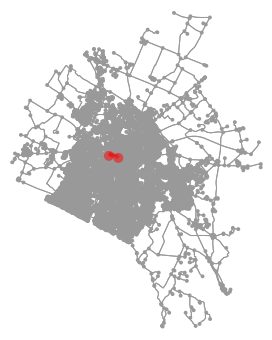

(<matplotlib.figure.Figure at 0x12104828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12104cf8>)

In [63]:
route = nx.shortest_path(G, origin, destination)
ox.plot_graph_route(G, route)

# Zoomed Map
Lexington (Fayette) map is too large to see the shortest route from origin to destination.  I am creating a second map, Z, which will be more focused on the campus area.

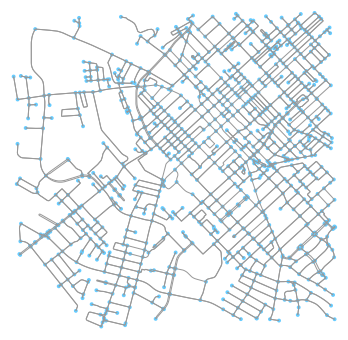

(<matplotlib.figure.Figure at 0x18c620f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18c6b630>)

In [64]:
Z = ox.graph_from_address('507 South Limestone, Lexington, Kentucky', distance = 2000, network_type = 'drive')
ox.plot_graph(ox.project_graph(Z))

# Route from home to the University of Kentucky
The variables for this are origin and destination1 using the Z (zoom) map.

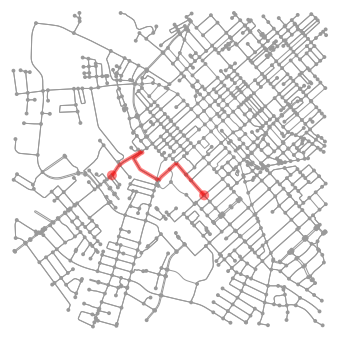

(<matplotlib.figure.Figure at 0x18c55278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18c554e0>)

In [65]:
route1 = nx.shortest_path(Z, origin, destination1)
ox.plot_graph_route(Z, route1)

# Route from home to Euclid Kroger
The variables for this are origin and destination2 using the Z (zoom) map.

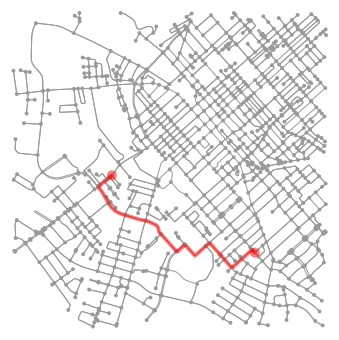

(<matplotlib.figure.Figure at 0x384b9d30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x291fe978>)

In [66]:
route2 = nx.shortest_path(Z, origin, destination2)
ox.plot_graph_route(Z, route2)

# Route from home to Newman Center
The variables for this are origin and destination3 using the Z (zoom) map.

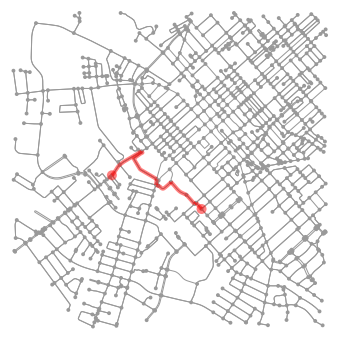

(<matplotlib.figure.Figure at 0x18c892b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18c89c50>)

In [67]:
route3 = nx.shortest_path(Z, origin, destination3)
ox.plot_graph_route(Z, route3)